# K Means Application

##### This code performs KMeans clustering on a dataset by first loading data from a CSV file and extracting feature columns. It applies the KMeans algorithm with an initial choice of 3 clusters and prints the cluster centers. To determine the optimal number of clusters, it uses the Elbow method, plotting the inertia values for different cluster counts from 1 to 10. Based on this analysis, it applies KMeans with the selected number of clusters (4 in this case) and prints the cluster assignments. Finally, it visualizes the clustering results with a scatter plot, using different colors to represent each cluster and clearly showing the separation between clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"

### Load Data

In [2]:
data = pd.read_csv("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\musteriler.csv")
X = data.iloc[:,3:].values

### Apply KMeans

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=3)

### Determine Optimal Number of Clusters using the Elbow Method

[[ 24208.42105263   5267.63157895]
 [ 65391.54929577   6175.70422535]
 [111220.58823529   7411.02941176]]


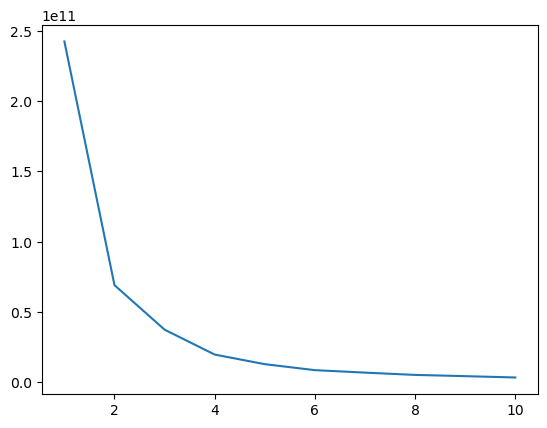

In [4]:
print(kmeans.cluster_centers_)
results = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(X)
    results.append(kmeans.inertia_)
plt.plot(range(1, 11), results)
plt.show()

### Apply KMeans with Chosen Number of Clusters

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=123)
Y_pred = kmeans.fit_predict(X)
print(Y_pred)

[3 3 3 2 2 2 2 3 2 0 0 3 0 2 3 1 3 2 3 3 2 2 3 0 1 0 2 3 2 0 2 0 0 3 0 0 0
 2 0 1 3 2 3 2 2 0 0 0 0 1 2 3 1 1 3 3 2 3 0 3 1 3 0 2 0 2 0 3 0 2 3 3 3 3
 2 2 1 3 0 2 2 2 0 0 1 3 3 0 2 2 3 2 1 0 2 0 2 3 2 2 0 1 3 2 2 3 3 0 0 1 1
 3 3 3 3 0 2 3 0 0 2 0 3 3 3 0 2 2 1 2 2 0 0 0 0 2 0 0 3 0 3 2 0 0 3 0 2 0
 0 2 0 0 3 2 0 1 2 0 1 2 0 2 2 0 2 0 0 3 2 2 3 2 2 0 0 2 2 0 1 0 0 3 0 1 3
 1 2 2 0 2 0 2 0 3 2 3 3 0 0 0]


### Visualize Results

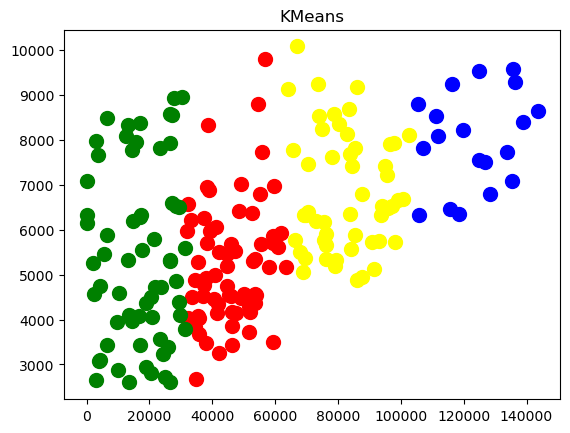

In [6]:
plt.title("KMeans")
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s=100, c='red')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s=100, c='blue')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s=100, c='green')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s=100, c='yellow')
plt.show()